* 구글에서 ydata-profiling 검색 후 EDA 쉽게할 수 있는 라이브러리 설치
* conda install -c conda-forge ydata-profiling

In [34]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from ydata_profiling import ProfileReport

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/shopping-data.csv")

In [ ]:
data

In [4]:
pf = ProfileReport(data)
pf.to_file("shopping.html")

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.05it/s]


# 계측정 군집분석
* 비지도 학습
* 데이터가 적을 경우 사용
* 거리 계산 지표
* 단일연결법(최단연결법)
* 완전연결법(최장연결법)
* 평균 연결법
* 중심 연결법
* 와드 연결법
* 덴드로그램으로 계층적 군집 시각화


In [5]:
import scipy.cluster.hierarchy as shc

In [6]:
data2 = pd.get_dummies(data, drop_first=True)
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data2 = data.iloc[:, 3:5]
data2

In [ ]:
plt.switch_backend('TkAgg')

In [ ]:
plt.figure(figsize=(30,10))
plt.title("Customer Dendrograms Single")
dend = shc.dendrogram(shc.linkage(data, method='single'))
plt.show()

In [ ]:
plt.figure(figsize=(30,10))
plt.title("Customer Dendrograms Complete")
dend = shc.dendrogram(shc.linkage(data, method='complete'))
plt.show()

In [ ]:
plt.figure(figsize=(30,10))
plt.title("Customer Dendrograms Average")
dend = shc.dendrogram(shc.linkage(data, method='average'))
plt.show()

In [ ]:
plt.figure(figsize=(30,10))
plt.title("Customer Dendrograms Weighted")
dend = shc.dendrogram(shc.linkage(data, method='weighted'))
plt.show()

In [ ]:
plt.figure(figsize=(30,10))
plt.title("Customer Dendrograms Centroid")
dend = shc.dendrogram(shc.linkage(data, method='centroid'))
plt.show()

In [ ]:
plt.figure(figsize=(30,10))
plt.title("Customer Dendrograms Ward")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

In [7]:
data2 = data.iloc[:, 3:5].values
data2[:3]

array([[15, 39],
       [15, 81],
       [16,  6]], dtype=int64)

C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


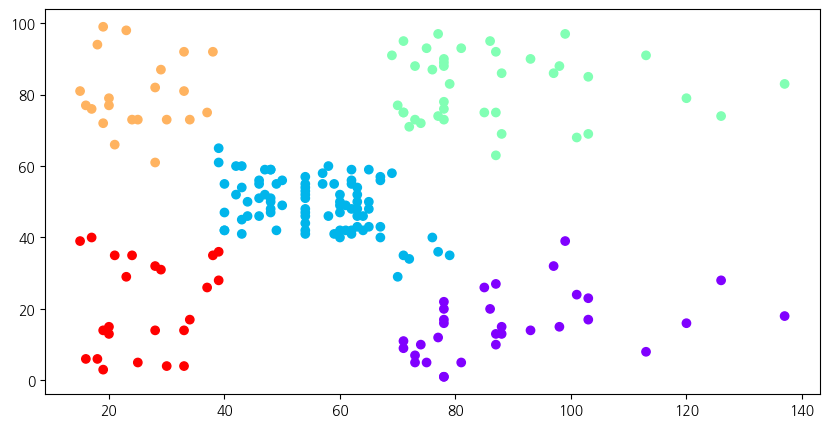

In [23]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
result = cluster.fit_predict(data2)
plt.figure(figsize=(10,5))
plt.scatter(data2[:,0], data2[:,1], c=cluster.labels_, cmap='rainbow')

In [16]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [24]:
data['cluster'] = result

In [18]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [25]:
data[data['cluster']==0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
128,129,Male,59,71,11,0
130,131,Male,47,71,9,0
134,135,Male,20,73,5,0
136,137,Female,44,73,7,0
138,139,Male,19,74,10,0
140,141,Female,57,75,5,0
144,145,Male,25,77,12,0
148,149,Female,34,78,22,0
150,151,Male,43,78,17,0
152,153,Female,44,78,20,0


In [26]:
data[data['cluster']==1]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
43,44,Female,31,39,61,1
45,46,Female,24,39,65,1
46,47,Female,50,40,55,1
47,48,Female,27,40,47,1
48,49,Female,29,40,42,1
...,...,...,...,...,...,...
126,127,Male,43,71,35,1
132,133,Female,25,72,34,1
142,143,Female,28,76,40,1
146,147,Male,48,77,36,1


In [27]:
data[data['cluster']==2]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
123,124,Male,39,69,91,2
125,126,Female,31,70,77,2
127,128,Male,40,71,95,2
129,130,Male,38,71,75,2
131,132,Male,39,71,75,2
133,134,Female,31,72,71,2
135,136,Female,29,73,88,2
137,138,Male,32,73,73,2
139,140,Female,35,74,72,2
141,142,Male,32,75,93,2


In [28]:
data[data['cluster']==3]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
1,2,Male,21,15,81,3
3,4,Female,23,16,77,3
5,6,Female,22,17,76,3
7,8,Female,23,18,94,3
9,10,Female,30,19,72,3
11,12,Female,35,19,99,3
13,14,Female,24,20,77,3
15,16,Male,22,20,79,3
17,18,Male,20,21,66,3
19,20,Female,35,23,98,3


# 비계층적 군집 분석

## K-Means(k평균)을 사용한 군집 분석

* 통신사 고객 이동 데이터 분석
  * 독립변수(feature) 20개: 회원ID, 성별, 고연령, 배우자, 피부양자, 가입기간, 전화서비스, 2회선이상, 인터넷서비스, 온라인보안, 온라인백업, 기기보호서비스, 기술지원, 스트리밍TV, 스트리밍Movies, 약정옵션, 온라인고지서, 지불수단, 월요금, 합산요금
  * 종속변수(target) 1개: 이탈여부

In [32]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/06%EA%B3%A0%EA%B0%9D%EC%9D%B4%ED%83%88%EC%98%88%EC%B8%A1.csv", encoding='cp949')

In [33]:
data.head()

,회원ID,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,...,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
pf = ProfileReport(data)
pf.to_file("통신사고객이탈.html")

Summarize dataset:  75%|██████████████████████████▎        | 24/32 [00:01<00:00, 25.52it/s, scatter 가입기간, 가입기간] matrix]C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.savefig(
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  plt.savefig(
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.savefig(
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.savefig(
Summarize dataset:  78%|████████████████████████████▉        | 25/32 [00:02<00:01,  6.79it/s, scatter 월요금, 가입기간]C:\Users\hi\anac

Summarize dataset:  85%|█████████████████████████████████▎     | 29/34 [00:03<00:00,  5.42it/s, Missing diagram matrix]C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  plt.savefig(
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.savefig(
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.savefig(
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.savefig(
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 44256

Generate report structure:   0%|                                                                 | 0/1 [00:00<?, ?it/s]C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.savefig(
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  plt.savefig(
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.savefig(
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.savefig(
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 50900 (\N{HAN

Export report to file: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


In [37]:
data.head()

,회원ID,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,...,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
data.info() #데이터타입 보자. 합산요금은 int나 float로 바꿔줘야하는구나.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   회원ID        7043 non-null   object 
 1   성별          7043 non-null   object 
 2   고연령         7043 non-null   int64  
 3   배우자         7043 non-null   object 
 4   피부양자        7043 non-null   object 
 5   가입기간        7043 non-null   int64  
 6   전화서비스       7043 non-null   object 
 7   2회선이상       7043 non-null   object 
 8   인터넷서비스      7043 non-null   object 
 9   온라인보안       7043 non-null   object 
 10  온라인백업       7043 non-null   object 
 11  기기보호서비스     7043 non-null   object 
 12  기술지원        7043 non-null   object 
 13  스트리밍TV      7043 non-null   object 
 14  스트리밍Movies  7043 non-null   object 
 15  약정옵션        7043 non-null   object 
 16  온라인고지서      7043 non-null   object 
 17  지불수단        7043 non-null   object 
 18  월요금         7043 non-null   float64
 19  합산요금        7043 non-null  

* 합산요금은 int나 float로 바꿔줘야하는구나.

In [39]:
data['합산요금'] = data['합산요금'].astype(float)

ValueError: could not convert string to float: ''

In [70]:
data['합산요금'].value_counts() # 아무것도 없는 게 11개가 나오네.!!

합산요금
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [83]:
na_index = data[data['합산요금'] == " "].index # 한칸 공백을 넣어줄 때 나오는 것들은 합산요금이 없는거네. 아직 요금을 내지 않은 신규가입자

* 월요금을 합산요금에 넣자. 
* 인덱스가 있는 걸 찾아야 해.

In [ ]:
def new_user(x):
    

In [86]:
na_index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [88]:
data['합산요금'] = data.apply(lambda x: x['월요금'] if x['합산요금'] == " " else x['합산요금'], axis=1) 

* apply를 응용해서 월요금과 합산요금을 비교하면서 할 수 있어.
* x에 데이터프레임을 다 넣고 한 행씩 월요금과 합산요금을 비교

In [90]:
data.loc[na_index] # 월요금과 합산요금이 잘 들어갔는지 인덱스에만 확인을 해보기.

,회원ID,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,...,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.7,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   회원ID        7043 non-null   object 
 1   성별          7043 non-null   object 
 2   고연령         7043 non-null   int64  
 3   배우자         7043 non-null   object 
 4   피부양자        7043 non-null   object 
 5   가입기간        7043 non-null   int64  
 6   전화서비스       7043 non-null   object 
 7   2회선이상       7043 non-null   object 
 8   인터넷서비스      7043 non-null   object 
 9   온라인보안       7043 non-null   object 
 10  온라인백업       7043 non-null   object 
 11  기기보호서비스     7043 non-null   object 
 12  기술지원        7043 non-null   object 
 13  스트리밍TV      7043 non-null   object 
 14  스트리밍Movies  7043 non-null   object 
 15  약정옵션        7043 non-null   object 
 16  온라인고지서      7043 non-null   object 
 17  지불수단        7043 non-null   object 
 18  월요금         7043 non-null   float64
 19  합산요금        7043 non-null  

<Axes: >

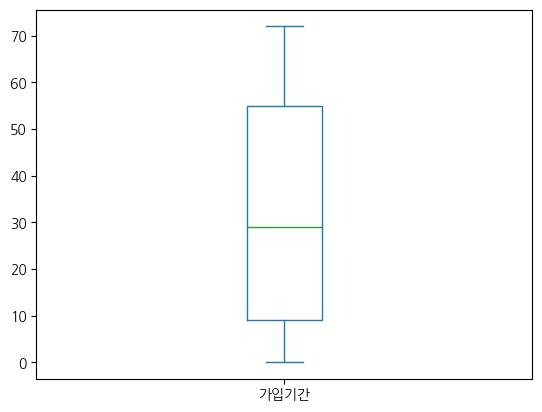

In [92]:
data['가입기간'].plot(kind='box')

<Axes: >

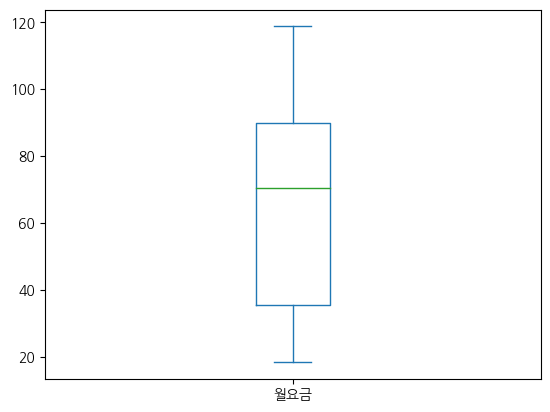

In [93]:
data['월요금'].plot(kind='box')

In [94]:
data['합산요금'] = data['합산요금'].astype(float)

In [95]:
data['합산요금'].dtype

dtype('float64')

<Axes: >

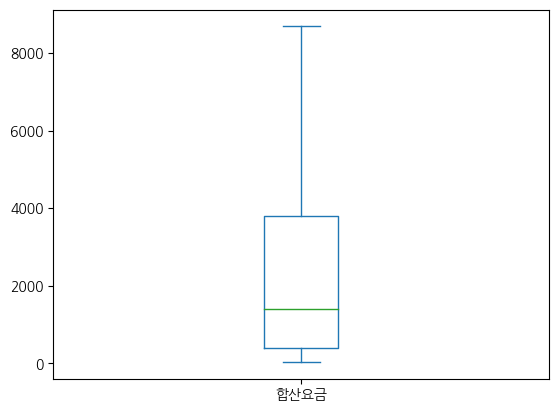

In [96]:
data['합산요금'].plot(kind='box')

* boxplot보니까 전처리해줄 건 없는 거 같아.

In [102]:
cols4dummy = []
for cols in data.columns:
    if data[cols].dtype == 'O':
        print(cols,':', data[cols].unique(), data[cols].nunique())
        cols4dummy.append(cols)

회원ID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 7043
성별 : ['Female' 'Male'] 2
배우자 : ['Yes' 'No'] 2
피부양자 : ['No' 'Yes'] 2
전화서비스 : ['No' 'Yes'] 2
2회선이상 : ['No phone service' 'No' 'Yes'] 3
인터넷서비스 : ['DSL' 'Fiber optic' 'No'] 3
온라인보안 : ['No' 'Yes' 'No internet service'] 3
온라인백업 : ['Yes' 'No' 'No internet service'] 3
기기보호서비스 : ['No' 'Yes' 'No internet service'] 3
기술지원 : ['No' 'Yes' 'No internet service'] 3
스트리밍TV : ['No' 'Yes' 'No internet service'] 3
스트리밍Movies : ['No' 'Yes' 'No internet service'] 3
약정옵션 : ['Month-to-month' 'One year' 'Two year'] 3
온라인고지서 : ['Yes' 'No'] 2
지불수단 : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 4
이탈여부 : ['No' 'Yes'] 2


* 대문자 O Object의 O

In [104]:
data = pd.get_dummies(data, columns=cols4dummy[1:], drop_first=True) 

In [105]:
data.head()

,회원ID,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,...,스트리밍TV_Yes,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes
0,7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,0,2,53.85,108.15,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,0,45,42.30,1840.75,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [107]:
X = data.drop(['회원ID', '이탈여부_Yes'], axis=1)
y = data['이탈여부_Yes']

In [108]:
X

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍TV_No internet service,스트리밍TV_Yes,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,False,True,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,False,True,True,True,False,True,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,True,True,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True


In [109]:
y

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: 이탈여부_Yes, Length: 7043, dtype: bool

In [110]:
from sklearn.cluster import KMeans

In [129]:
km = KMeans(n_clusters=3) # yes, no니까 두개만
km.fit(X)
result = km.labels_

C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [130]:
data['label'] = result
data.head()

,회원ID,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,...,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes,label
0,7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,...,False,False,False,False,True,False,True,False,0,1
1,5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,...,False,False,True,False,False,False,False,True,0,1
2,3668-QPYBK,0,2,53.85,108.15,True,False,False,True,False,...,False,False,False,False,True,False,False,True,1,1
3,7795-CFOCW,0,45,42.30,1840.75,True,False,False,False,True,...,False,False,True,False,False,False,False,False,0,1
4,9237-HQITU,0,2,70.70,151.65,False,False,False,True,False,...,False,False,False,False,True,False,True,False,1,1


In [131]:
data['이탈여부_Yes'].apply(lambda x: 1 if x == True else 0)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: 이탈여부_Yes, Length: 7043, dtype: int64

In [132]:
data['이탈여부_Yes'] = data['이탈여부_Yes'].apply(lambda x: 1 if x == True else 0)

In [124]:
from sklearn.metrics import accuracy_score

In [133]:
print(accuracy_score(data['이탈여부_Yes'], data['label']))

0.3677410194519381


In [140]:
data[data['label'] == 0].describe() # 군집화 된 애들의 특성이 무엇이 있는지 파악

,고연령,가입기간,월요금,합산요금,이탈여부_Yes,label
count,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.0
mean,0.207196,44.123449,77.810701,3280.360205,0.222705,0.0
std,0.405423,13.449781,17.990792,814.669932,0.416191,0.0
min,0.000000,19.000000,26.000000,1985.150000,0.000000,0.0
25%,0.000000,33.000000,63.887500,2553.612500,0.000000,0.0
50%,0.000000,43.000000,79.325000,3218.700000,0.000000,0.0
75%,0.000000,54.000000,93.212500,3974.950000,0.000000,0.0
max,1.000000,72.000000,116.250000,4786.150000,1.000000,0.0


In [137]:
data[data['label'] == 1].describe()

,고연령,가입기간,월요금,합산요금,이탈여부_Yes,label
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.0
mean,0.128352,18.213602,49.741810,686.056370,0.320163,1.0
std,0.334522,19.213577,27.151167,573.641708,0.466595,0.0
min,0.000000,0.000000,18.250000,18.800000,0.000000,1.0
25%,0.000000,3.000000,20.550000,159.900000,0.000000,1.0
50%,0.000000,12.000000,48.675000,534.875000,0.000000,1.0
75%,0.000000,25.000000,74.650000,1140.987500,1.000000,1.0
max,1.000000,72.000000,112.950000,1983.150000,1.000000,1.0


In [139]:
data[data['label'] == 2].describe()

,고연령,가입기간,월요금,합산요금,이탈여부_Yes,label
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.0
mean,0.216733,64.384861,97.979243,6297.778685,0.137849,2.0
std,0.412183,7.415075,11.825757,1001.345310,0.344878,0.0
min,0.000000,43.000000,64.750000,4793.800000,0.000000,2.0
25%,0.000000,59.000000,89.550000,5478.075000,0.000000,2.0
50%,0.000000,66.000000,99.900000,6151.900000,0.000000,2.0
75%,0.000000,71.000000,107.375000,7044.175000,0.000000,2.0
max,1.000000,72.000000,118.750000,8684.800000,1.000000,2.0


In [141]:
km.inertia_

3706129806.0009065

# K-means의 K값을 얻기 위한 엘보우 메소드 사용하기

In [143]:
distance = []
for i in range(1,21):
    km=KMeans(n_clusters = i)
    km.fit(X)
    distance.append(km.inertia_)

C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

<Axes: >

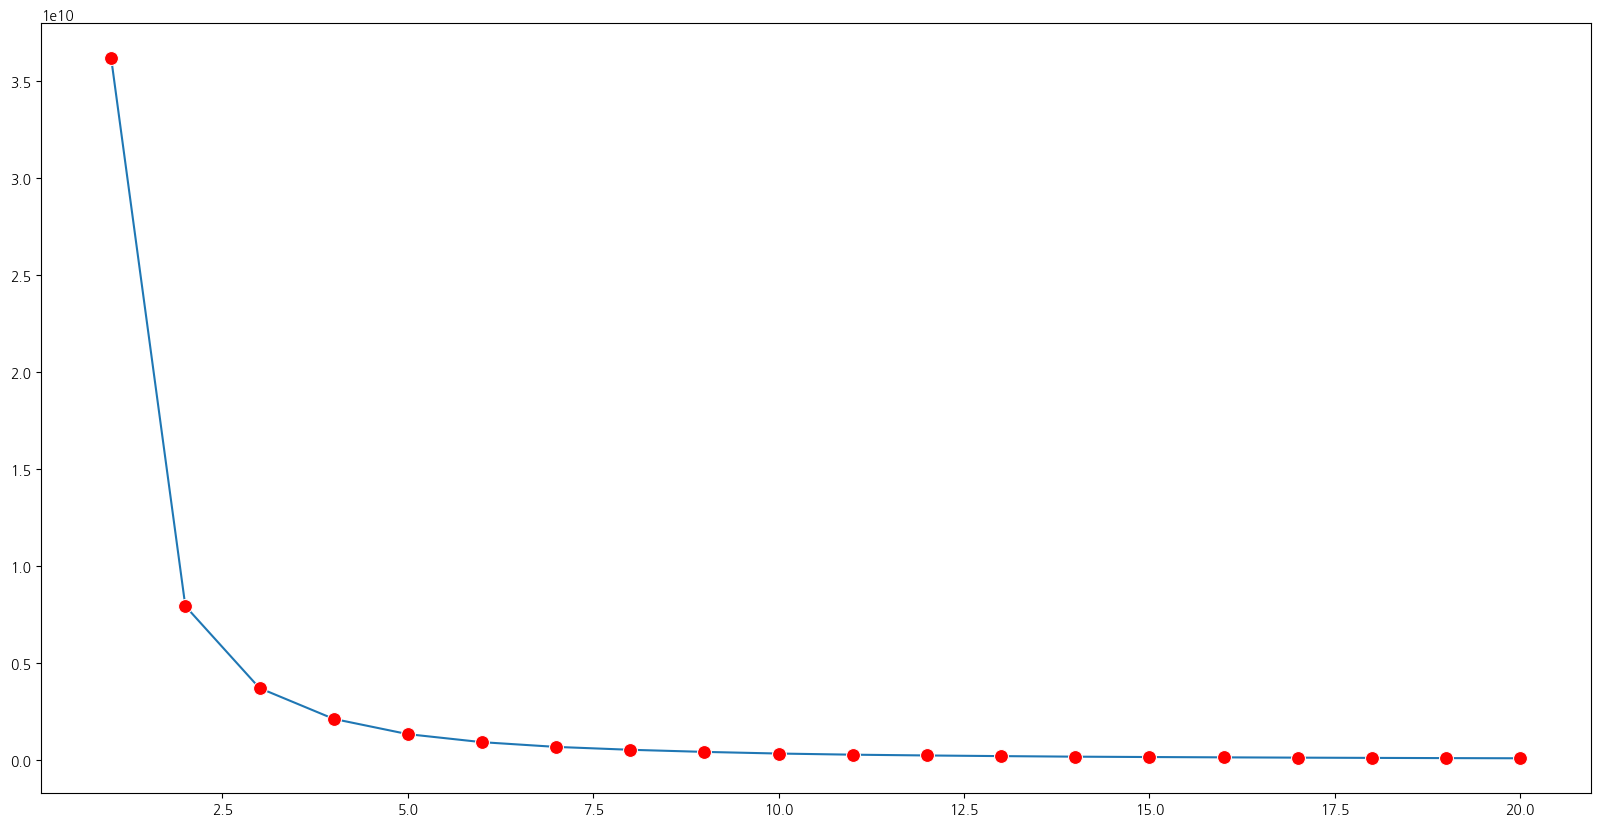

In [145]:
plt.figure(figsize=(20,10))
sns.lineplot(x = range(1,21), y = distance, marker='o', markersize=10, markerfacecolor='red')

* 이거보니 3개로 군집을 만들면 되겠구나 파악하기.

데이터 프레임을 스케일링 후 재분석.( 정규화 )

In [147]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_scaled = mm.fit_transform(X)

In [157]:
km2 = KMeans(n_clusters=3)
km2.fit(X_scaled)
result2 = km2.labels_
distance2 = km2.inertia_

C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [155]:
accuracy_score(result, result2)

0.47678546074116146

In [153]:
distance2 = []
for i in range(1,21):
    km2=KMeans(n_clusters = i)
    km2.fit(X_scaled)
    distance2.append(km2.inertia_)

C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

<Axes: >

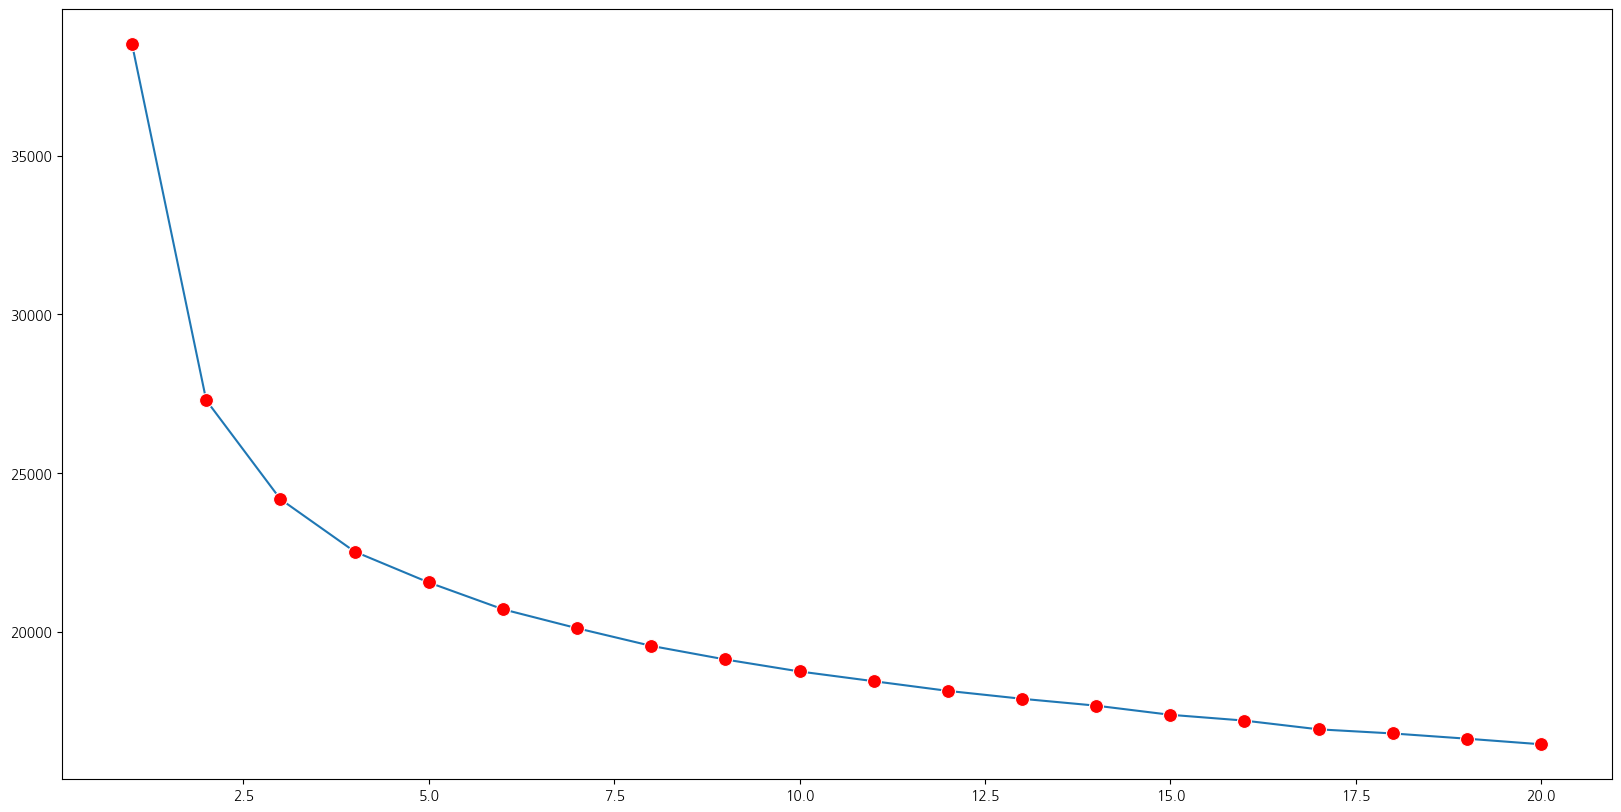

In [156]:
plt.figure(figsize=(20,10))
sns.lineplot(x = range(1,21), y = distance2, marker='o', markersize=10, markerfacecolor='red')

In [158]:
data['result2'] = result2

In [159]:
data.head()

,회원ID,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,...,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes,label,result2
0,7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,...,False,False,False,True,False,True,False,0,1,2
1,5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,...,False,True,False,False,False,False,True,0,1,2
2,3668-QPYBK,0,2,53.85,108.15,True,False,False,True,False,...,False,False,False,True,False,False,True,1,1,2
3,7795-CFOCW,0,45,42.30,1840.75,True,False,False,False,True,...,False,True,False,False,False,False,False,0,1,2
4,9237-HQITU,0,2,70.70,151.65,False,False,False,True,False,...,False,False,False,True,False,True,False,1,1,2


In [161]:
data[data['result2'] == 0].describe()

,고연령,가입기간,월요금,합산요금,이탈여부_Yes,label,result2
count,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.0
mean,0.185155,52.384026,88.722348,4672.385397,0.167003,1.091569,0.0
std,0.388502,18.202413,18.254339,1968.483495,0.373054,0.943140,0.0
min,0.000000,0.000000,35.400000,52.550000,0.000000,0.000000,0.0
25%,0.000000,41.000000,75.350000,3211.550000,0.000000,0.000000,0.0
50%,0.000000,57.000000,92.950000,4749.150000,0.000000,1.000000,0.0
75%,0.000000,68.000000,104.050000,6167.950000,0.000000,2.000000,0.0
max,1.000000,72.000000,118.750000,8684.800000,1.000000,2.000000,0.0


In [163]:
data[data['result2'] == 1].describe()

,고연령,가입기간,월요금,합산요금,이탈여부_Yes,label,result2
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.0
mean,0.034076,30.547182,21.079194,662.690564,0.074050,0.998689,1.0
std,0.181484,24.356507,2.164221,555.527036,0.261938,0.036191,0.0
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,1.0
25%,0.000000,8.000000,19.700000,157.825000,0.000000,1.000000,1.0
50%,0.000000,25.000000,20.150000,519.200000,0.000000,1.000000,1.0
75%,0.000000,52.750000,20.900000,1108.650000,0.000000,1.000000,1.0
max,1.000000,72.000000,26.900000,2006.950000,1.000000,1.000000,1.0


In [162]:
data[data['result2'] == 2].describe()

,고연령,가입기간,월요금,합산요금,이탈여부_Yes,label,result2
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.0
mean,0.207702,16.956880,67.151761,1139.735056,0.441738,0.808427,2.0
std,0.405729,16.250502,19.799837,1144.688859,0.496676,0.417159,0.0
min,0.000000,0.000000,23.450000,23.450000,0.000000,0.000000,2.0
25%,0.000000,3.000000,50.450000,209.300000,0.000000,1.000000,2.0
50%,0.000000,12.000000,70.350000,763.525000,0.000000,1.000000,2.0
75%,0.000000,26.000000,83.787500,1759.912500,1.000000,1.000000,2.0
max,1.000000,71.000000,105.000000,5817.700000,1.000000,2.000000,2.0


# DBSCAN (Density Based Spatial Clustering of Applications with Noise)
* 밀도 기반 군집화의 대표적인 알고리즘
* 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화 가능

### DBSCAN의 중요한 두 가지 파라미터
* 입실론주변 영역(epsilon): 개별 데이터를 중심으로 입실론 변경을 가지는 원형의 영역
* 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

In [192]:
df = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/shopping-data.csv")

In [166]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [193]:
from sklearn.preprocessing import StandardScaler

In [194]:
data = df[['Annual Income (k$)','Spending Score (1-100)']]

In [195]:
ss =StandardScaler()
df_scaled = ss.fit_transform(data)
df_scaled = pd.DataFrame(df_scaled, columns=['Annual Income (k$)','Spending Score (1-100)'])
df_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [196]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.5, min_samples=2)
result = model.fit_predict(df_scaled)
df_scaled['cluster'] = result

In [197]:
df_scaled.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,0


In [204]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.5, min_samples=5)
result = model.fit(df_scaled)
df_scaled['cluster'] = result

In [210]:
df['cluster'].unique()

array([ 0,  1,  2,  3, -1], dtype=int64)

In [209]:
df_scaled['cluster'].unique()

array([DBSCAN()], dtype=object)

In [189]:
df_scaled.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,-1.738999,-0.434801,DBSCAN(min_samples=2)
1,-1.738999,1.195704,DBSCAN(min_samples=2)
2,-1.700830,-1.715913,DBSCAN(min_samples=2)
3,-1.700830,1.040418,DBSCAN(min_samples=2)
4,-1.662660,-0.395980,DBSCAN(min_samples=2)


In [198]:
df['cluster'] = result # df 클러스터에 result를 합쳐!

In [199]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,-1


In [200]:
df[df['cluster']==0].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,157.000000,157.000000,157.000000,157.000000,157.0
mean,82.789809,40.369427,52.490446,43.101911,0.0
std,51.492971,15.249332,21.811141,22.249225,0.0
min,1.000000,18.000000,15.000000,1.000000,0.0
25%,40.000000,26.000000,37.000000,28.000000,0.0
50%,79.000000,40.000000,54.000000,46.000000,0.0
75%,118.000000,51.000000,65.000000,55.000000,0.0
max,191.000000,70.000000,103.000000,99.000000,0.0


In [201]:
df[df['cluster']==1].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,36.000000,36.000000,36.000000,36.000000,36.0
mean,159.000000,32.722222,83.111111,82.416667,1.0
std,21.071308,3.836748,11.295455,9.640317,0.0
min,124.000000,27.000000,69.000000,63.000000,1.0
25%,141.500000,30.000000,74.750000,74.750000,1.0
50%,159.000000,32.000000,78.000000,85.500000,1.0
75%,176.500000,36.000000,88.000000,90.250000,1.0
max,194.000000,40.000000,113.000000,97.000000,1.0


In [202]:
df[df['cluster']==2].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,2.000000,2.000000,2.000000,2.000000,2.0
mean,194.000000,40.000000,116.500000,12.000000,2.0
std,1.414214,9.899495,4.949747,5.656854,0.0
min,193.000000,33.000000,113.000000,8.000000,2.0
25%,193.500000,36.500000,114.750000,10.000000,2.0
50%,194.000000,40.000000,116.500000,12.000000,2.0
75%,194.500000,43.500000,118.250000,14.000000,2.0
max,195.000000,47.000000,120.000000,16.000000,2.0


In [203]:
df[df['cluster']==-1].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,3.000000,3.000000,3.000000,3.0,3.0
mean,198.666667,35.666667,133.333333,43.0,-1.0
std,1.527525,8.144528,6.350853,35.0,0.0
min,197.000000,30.000000,126.000000,18.0,-1.0
25%,198.000000,31.000000,131.500000,23.0,-1.0
50%,199.000000,32.000000,137.000000,28.0,-1.0
75%,199.500000,38.500000,137.000000,55.5,-1.0
max,200.000000,45.000000,137.000000,83.0,-1.0


* min_samples = 12로 고정, eps만 값을 바꿔보며 군집화 실행

TypeError: float() argument must be a string or a number, not 'DBSCAN'

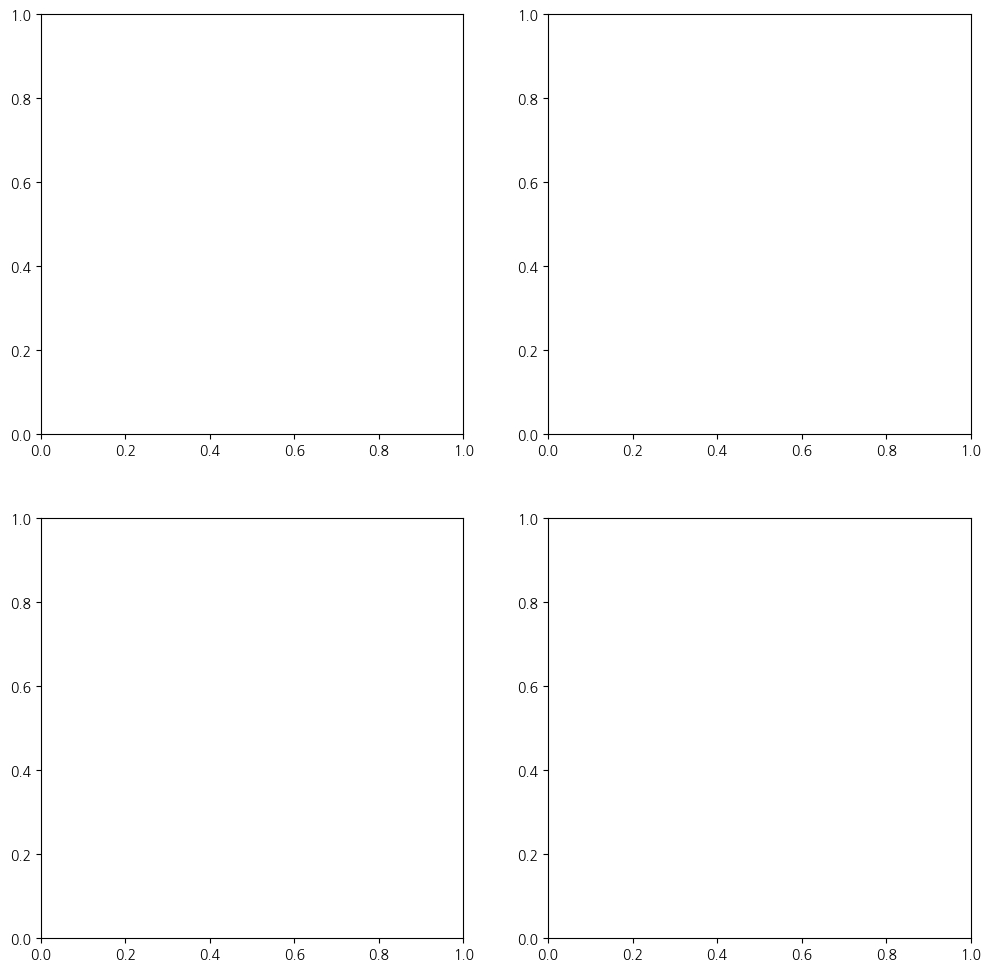

In [220]:
f, ax = plt.subplots(2,2)
f.set_size_inches((12,12))

for i in range(4):
    eps = 0.4 * (i + 1)
    min_samples = 12

    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(df_scaled)
    df_scaled['cluster'] = model.fit_predict(df_scaled)
    
    for j in range(-1, df_scaled['cluster'].max() +1):
        ax[i // 2, i % 2].scatter(df_scaled.loc[df_scaled['cluster']==j, 'Annual Income (k$)'], df_scaled.loc[df_scaled['cluster']==j, 'Spending Score (1-100)'],
                                 label = 'cluster' +str(j))
        ax[i // 2, i % 2].legend()
        ax[i // 2, i % 2].set_title(f'eps = {eps:.1f}, min_samples{min_samples}', size=15)
        ax[i // 2, i % 2].set_xlabel('Annual Income', size=12)
        ax[i // 2, i % 2].set_ylabel('Spending Score', size=12)
plt.show()